In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
from sklearn.model_selection import train_test_split
from pandas import DataFrame

In [3]:
FLT_1 = pd.read_excel('FLT 1 datasets.xlsx')
a = FLT_1.drop(columns='t(s)')
a

,aoa (deg),pitch (deg),pitch speed (deg/s),true speed (m/s),x acceleration (m/s2),z acceleration (m/s2),Cd,Cl,Cm
0,1.978644,1.994105,0.009835,50.741865,1.053801,-7.403692,0.050988,0.460989,0.001941
1,1.978343,1.994686,0.009787,50.742590,1.054149,-7.405721,0.050972,0.461021,0.001953
2,1.978041,1.995267,0.009738,50.743315,1.054484,-7.407809,0.050956,0.461052,0.001966
3,1.977740,1.995847,0.009690,50.744040,1.054807,-7.409959,0.050941,0.461083,0.001978
4,1.977439,1.996428,0.009642,50.744765,1.055118,-7.412167,0.050925,0.461115,0.001990
...,...,...,...,...,...,...,...,...,...
99995,2.391689,2.924688,-0.012253,50.285324,0.749623,-9.715756,0.043411,0.416994,-0.004519
99996,2.391753,2.924688,-0.012253,50.285324,0.749756,-9.716056,0.043395,0.416750,-0.004529
99997,2.391817,2.924688,-0.012253,50.285324,0.749889,-9.716355,0.043379,0.416508,-0.004539
99998,2.391882,2.924688,-0.012253,50.285324,0.750021,-9.716652,0.043364,0.416266,-0.004549


In [4]:
x = a[0:(len(a)-1)]
y = a[1:(len(a))]

print(x.shape)
print(y.shape)

x_main, x_test, y_main, y_test = train_test_split(x, y, test_size = 10000)
x_train, x_val, y_train, y_val = train_test_split(x_main, y_main, test_size = 10000)

x_test = DataFrame.sort_index(x_test, ignore_index=True)
y_test = DataFrame.sort_index(y_test, ignore_index=True)

x_train = DataFrame.sort_index(x_train, ignore_index=True)
y_train = DataFrame.sort_index(y_train, ignore_index=True)

x_val = DataFrame.sort_index(x_val, ignore_index=True)
y_val = DataFrame.sort_index(y_val, ignore_index=True)

x_train = x_train.drop(columns='x acceleration (m/s2)').drop(columns='z acceleration (m/s2)')
x_test = x_test.drop(columns='x acceleration (m/s2)').drop(columns='z acceleration (m/s2)')
x_val = x_val.drop(columns='x acceleration (m/s2)').drop(columns='z acceleration (m/s2)')

y_test = y_test.drop(columns='Cd').drop(columns='Cl').drop(columns='Cm')
y_train = y_train.drop(columns='Cd').drop(columns='Cl').drop(columns='Cm')
y_val = y_val.drop(columns='Cd').drop(columns='Cl').drop(columns='Cm')

x_test = x_test.to_numpy()
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()

y_test = y_test.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

print (x_test.shape)
print (x_train.shape)
print (x_val.shape)

print (y_test.shape)
print (y_train.shape)
print (y_val.shape)


(99999, 9)
(99999, 9)
(10000, 7)
(79999, 7)
(10000, 7)
(10000, 6)
(79999, 6)
(10000, 6)


In [5]:

# x = x_transpose
# y = y
initializers = keras.initializers.GlorotNormal()
model = keras.Sequential([
    keras.layers.Dense(7 , input_shape= (7,)),
    keras.layers.Dense(10 ,activation = "sigmoid"),
    keras.layers.Dense(6 ,activation = "linear",),
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['Accuracy']
               )

history = model.fit(x_train, y_train, validation_data=[x_val, y_val], epochs = 1000, batch_size=100)
model.summary()




Epoch 1/1000
800/800 [==============================] - 2s 2ms/step - loss: 364.6588 - Accuracy: 1.0000 - val_loss: 323.6130 - val_Accuracy: 1.0000
Epoch 2/1000
800/800 [==============================] - 1s 2ms/step - loss: 290.0218 - Accuracy: 1.0000 - val_loss: 258.6196 - val_Accuracy: 1.0000
Epoch 3/1000
800/800 [==============================] - 1s 2ms/step - loss: 230.8084 - Accuracy: 1.0000 - val_loss: 204.4639 - val_Accuracy: 1.0000
Epoch 4/1000
800/800 [==============================] - 1s 2ms/step - loss: 180.7981 - Accuracy: 1.0000 - val_loss: 158.3364 - val_Accuracy: 1.0000
Epoch 5/1000
800/800 [==============================] - 2s 2ms/step - loss: 138.2355 - Accuracy: 1.0000 - val_loss: 119.2363 - val_Accuracy: 1.0000
Epoch 6/1000
800/800 [==============================] - 2s 2ms/step - loss: 102.4269 - Accuracy: 1.0000 - val_loss: 86.6478 - val_Accuracy: 1.0000
Epoch 7/1000
800/800 [==============================] - 2s 2ms/step - loss: 72.9220 - Accuracy: 1.0000 - val_loss

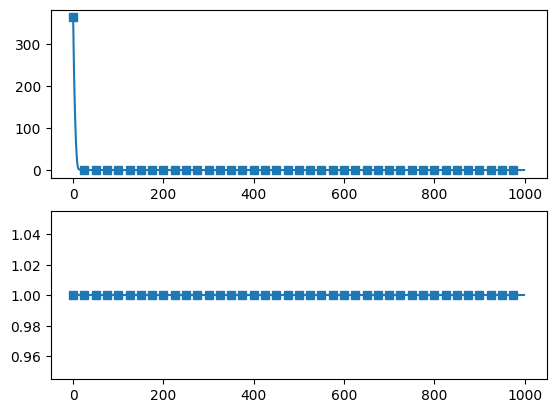

In [80]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], marker = 's', markevery = 25)
ax[1].plot(history.history['Accuracy'], marker = 's', markevery = 25)

In [7]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [8]:
y_pred.shape

(10000, 6)

In [9]:
a = y_pred[:,0]
b = y_pred[:,1]
c = y_pred[:,2]
d = y_pred[:,3]
e = y_pred[:,4]
f = y_pred[:,5]



print('R-square aoa:',r2_score(y_val[:,0], a))
print('R-square pitch:',r2_score(y_val[:,1], b))
print('R-square pitch speed:',r2_score(y_val[:,2], c))
print('R-square true speed:',r2_score(y_val[:,3], d))
print('R-square ax:',r2_score(y_val[:,4], e))
print('R-square az:',r2_score(y_val[:,5], f))





R-square aoa: 0.9648070689341396
R-square pitch: 0.9848772040194542
R-square pitch speed: 0.9450138595031019
R-square true speed: 0.9941907685986893
R-square ax: 0.7582779424864561
R-square az: 0.9442749872219905


In [56]:
print('R-square:',r2_score(y_val, y_pred))

R-square: 0.9319069717939721


TypeError: 'int' object is not iterable

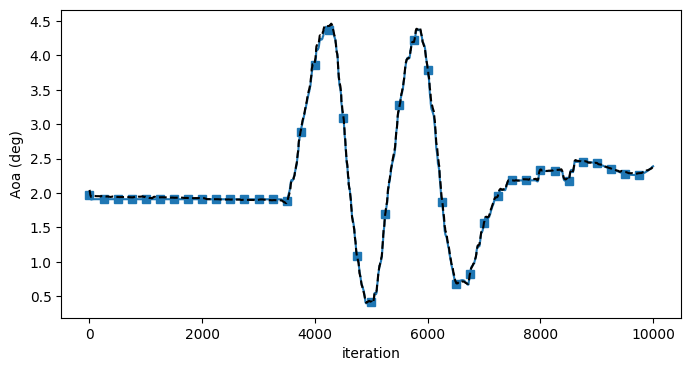

: 

In [97]:
plt.figure(figsize=(8,4))
plt.plot (y_test[:,0], marker='s', markevery = 250 ,label="True")
plt.plot (y_pred[:,0], "k--", label='Predictions')
plt.ylabel("Aoa (deg)")
plt.xlabel("iteration")
plt.xticks(np.arange(min(0), max(10000)+1, 1000))
plt.legend()
plt.show()
print('R-square aoa:',r2_score(y_val[:,0], a))


R-square pitch: 0.9848772040194542


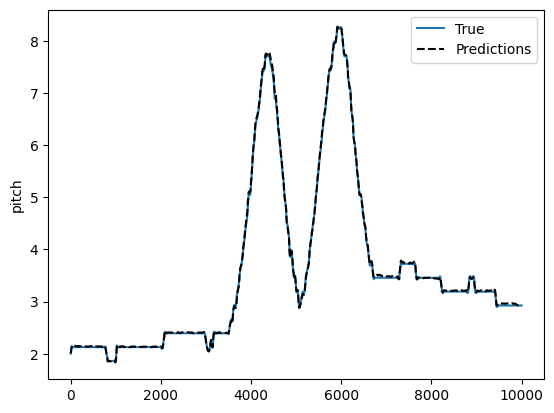

In [12]:

plt.plot (y_test[:,1], label="True")
plt.plot (y_pred[:,1], 'k--', label='Predictions')
plt.ylabel ("pitch")
plt.legend()
print('R-square pitch:',r2_score(y_val[:,1], b))


R-square pitch speed: 0.9450138595031019


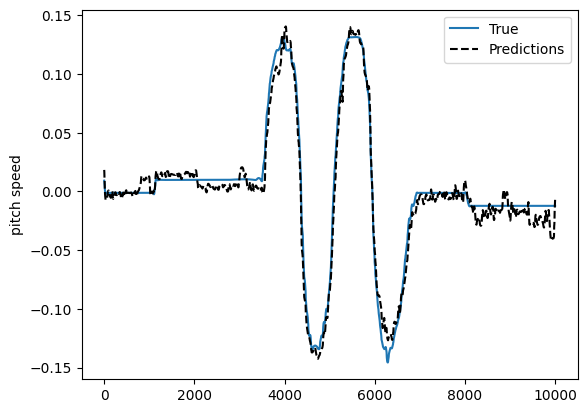

In [13]:

plt.plot (y_test[:,2], label="True")
plt.plot (y_pred[:,2], 'k--', label='Predictions')
plt.ylabel("pitch speed")
plt.legend()
print('R-square pitch speed:',r2_score(y_val[:,2], c))


R-square pitch speed: 0.9941907685986893


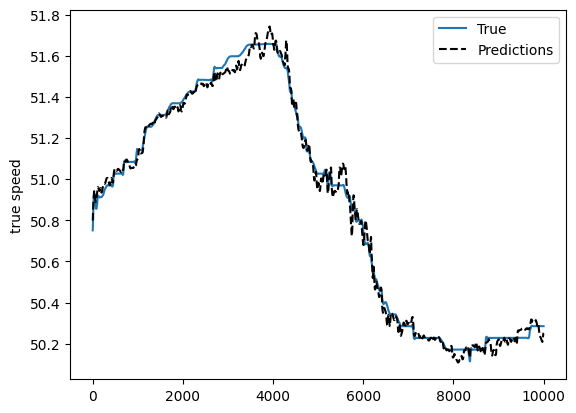

In [14]:

plt.plot (y_test[:,3], label="True")
plt.plot (y_pred[:,3], 'k--', label='Predictions')
plt.ylabel("true speed")
plt.legend()
print('R-square pitch speed:',r2_score(y_val[:,3], d))

R-square ax: 0.7582779424864561


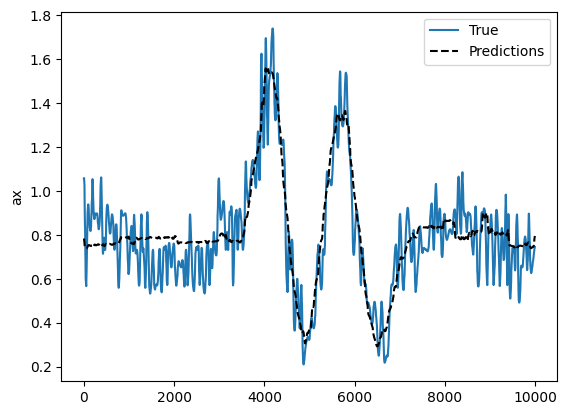

In [15]:

plt.plot (y_test[:,4], label="True")
plt.plot (y_pred[:,4], 'k--', label='Predictions')
plt.ylabel("ax")
plt.legend()
print('R-square ax:',r2_score(y_val[:,4], e))

R-square az: 0.9442749872219905


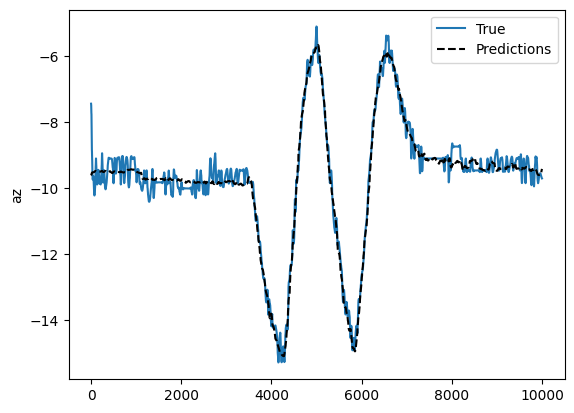

In [16]:

plt.plot (y_test[:,5], label="True")
plt.plot (y_pred[:,5], 'k--', label='Predictions')
plt.ylabel("az")
plt.legend()
print('R-square az:',r2_score(y_val[:,5], f))